In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime


In [2]:
sns.set()

# Import retail data

In [3]:
retail_df = pd.read_csv("/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/data/OnlineRetail.csv", encoding='unicode_escape')

In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
retail_df['InvoiceDate'] = (pd.to_datetime(retail_df['InvoiceDate']).
                            dt.strftime('%Y-%m-%d'))

In [6]:

data = (retail_df
        .groupby(['InvoiceDate', 'StockCode'])
        .sum()
        .reset_index()
        .sort_values(['StockCode', 'InvoiceDate'], ascending=True)
        [['InvoiceDate', 'StockCode', 'Quantity']])

In [7]:
data.pivot_table(columns='StockCode', index='InvoiceDate', values='Quantity')

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01,60.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,...,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-02,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-03,8.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,...,56.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-06,25.0,NaN,NaN,NaN,NaN,4.0,NaN,3.0,2.0,NaN,...,20.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,802.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Due to lack of data for training a quantity forecasting per each item or multiforecast model we will transorm the data for a total incomes per day

In [8]:
incomes_df = (retail_df
    .groupby('InvoiceDate')
    .sum()
    .reset_index()
    .assign(income = lambda df: df.Quantity*df.UnitPrice)
    .rename(columns={'InvoiceDate':'date'})
    [['date', 'income']]
)

<Axes: >

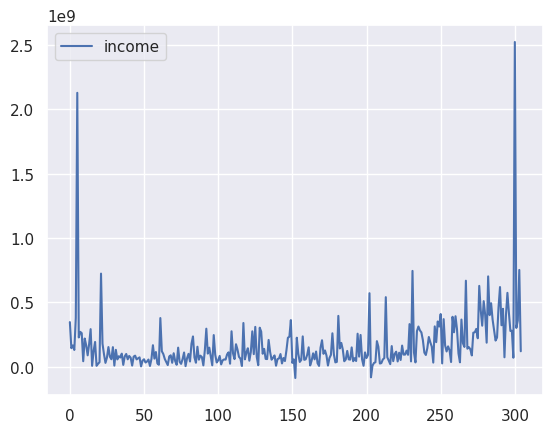

In [9]:
incomes_df.plot()

We can see two weel defined outliers, we will handle them next

In [10]:
ordered_df = (incomes_df
                .sort_values('income', ascending=False)
                .reset_index())

Replacing the outlies with the mean

In [11]:
mean_income = incomes_df['income'].mean()
ordered_df.at[0, 'income'] = mean_income
ordered_df.at[1, 'income'] = mean_income

In [12]:
final_data = (ordered_df
              .drop(columns=['index'])
              .sort_values('date', ascending=True))

<Axes: xlabel='date'>

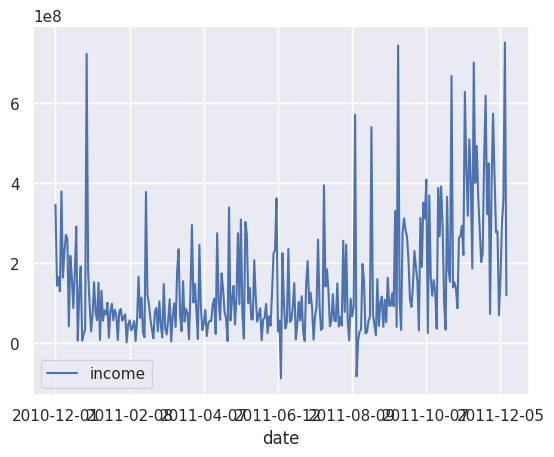

In [13]:
final_data.plot(x='date', y='income')

Saving the data

In [14]:
final_data.to_csv('/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/data/income_per_day.csv', index=False)